In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(" ")

In [2]:
# Reading data

data = pd.read_csv("D:/VIT 5th sem/FMEL_Dataset.csv")
print(len(data))
data.head(5)

37147


,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [3]:
# Data pre processing

data.isnull().sum()

id              0
season          0
division        0
round           0
localTeam       0
visitorTeam     0
localGoals      0
visitorGoals    0
date            0
timestamp       0
dtype: int64

In [4]:
data = data.drop(["id","timestamp"],axis=1)
data.head(5)

,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date
0,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970
1,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970
2,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970
3,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970
4,1970-71,1,1,Elche,Granada,1,1,13/09/1970


In [5]:
# creating result columns by comparing home and visitor team goals


condition = [(data["localGoals"] > data["visitorGoals"]),(data["localGoals"] < data["visitorGoals"]),
             (data["localGoals"] == data["visitorGoals"])]
value = ["local","visitor","draw"]

data["result"] = np.select(condition,value)

data.head(5)

,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,result
0,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,draw
1,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,draw
2,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,local
3,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,local
4,1970-71,1,1,Elche,Granada,1,1,13/09/1970,draw


In [6]:
res = data.groupby("result")["result"].count()
res

result
draw       10236
local      18787
visitor     8124
Name: result, dtype: int64

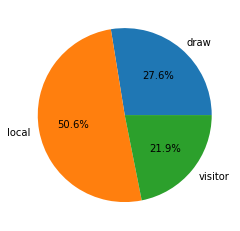

In [7]:
# Pie chart of results

lab=["draw","local","visitor"]
plt.pie(res,labels=lab,autopct="%1.1f%%")
plt.show()

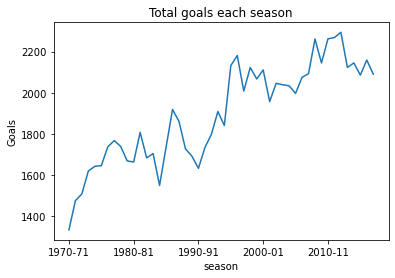

In [8]:
# Number of goals each season

data['totalGoals'] = data['visitorGoals'] + data['localGoals']

# Number of total goals per season has increased over time
plt.title("Total goals each season")
plt.ylabel("Goals")
data.groupby('season')['totalGoals'].sum().plot()

plt.show()

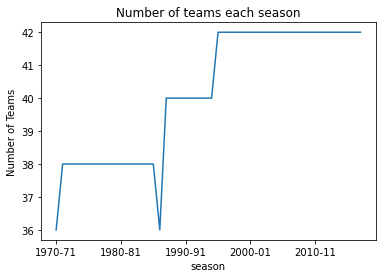

In [9]:
# Number of Teams each season

plt.title("Number of teams each season")
plt.ylabel("Number of Teams")

data.groupby('season')['localTeam'].nunique().plot()
plt.show()

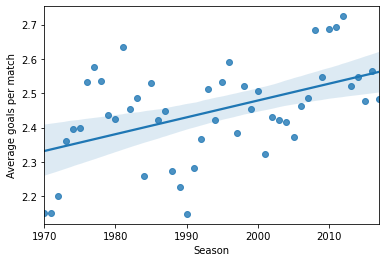

In [10]:
# The average goal per match per season linear regression

avg_goals_per_season = data.groupby('season')['totalGoals'].mean().reset_index()
avg_goals_per_season['season'] = avg_goals_per_season['season'].map(lambda s: int(s[:4]))

reg = sns.regplot(x='season', y='totalGoals', data=avg_goals_per_season)
reg.set(xlabel='Season', ylabel='Average goals per match')
plt.show()

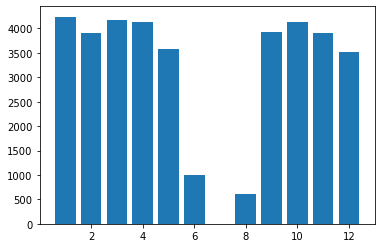

In [11]:
# Number of games played each month

data['gameDate'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['gameMonth'] = data['gameDate'].dt.month
data['gameWeekday'] = data['gameDate'].dt.weekday


month = data.groupby([data['gameDate'].dt.month])['round'].count().reset_index()

plt.bar(month["gameDate"],month["round"])
plt.show()

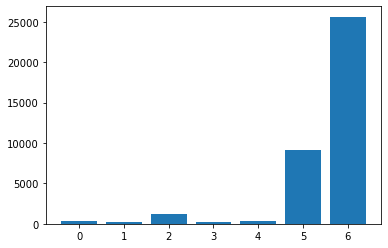

In [12]:
# Number of games played per days of a week

weekday = data.groupby('gameWeekday')['round'].count().reset_index()
#print(weekday)
plt.bar(weekday["gameWeekday"],weekday["round"])
plt.show()


In [15]:
# Calculating local and visitor wins of a team each season

df = data.merge(pd.get_dummies(data['result']), left_index=True, right_index=True)

df['local_wins_this_season'] = df.groupby(['season','localTeam'])['local'].transform('sum')
df['visitor_wins_this_season'] = df.groupby(['season','visitorTeam'])['visitor'].transform('sum')

print(" ")


In [23]:
# Which teams win the most local games on average per season

(
df.groupby(['localTeam'])['local_wins_this_season']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)

,count,mean
localTeam,,
Real Madrid,885,14.1
Barcelona,885,14.0
Sant Andreu,133,12.3
Barakaldo,114,11.7
Atletico de Madrid,889,11.6
Valencia,885,11.1
AD Ceuta,19,11.0
Sevilla,897,10.9
Alcorcon,168,10.8


In [24]:
# Which teams win the most visitor games on average per season
(
    df.groupby(['visitorTeam'])['visitor_wins_this_season']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)

,count,mean
visitorTeam,,
Real Madrid,885,8.4
Barcelona,885,8.1
Burgos CF,21,8.0
Villarreal B,63,6.3
Atletico de Madrid,889,6.1
Girona,208,6.0
Mallorca B,21,6.0
Alicante,21,6.0
Toledo,139,5.7


In [17]:
# Calculating total wins, visitor wins and local wins of a team each season
# and storing it in a new dataframe

visitor_results = (df
                   .groupby(['season', 'visitorTeam'])['visitor']
                   .sum()
                   .reset_index()
                   .rename(columns={'visitorTeam': 'team',
                                    'visitor': 'visitor_wins'}))

local_results = (df
                 .groupby(['season', 'localTeam'])['local']
                 .sum()
                 .reset_index()
                 .rename(columns={'localTeam': 'team',
                                  'local': 'local_wins'}))

wins_per_season = visitor_results.merge(local_results, on=['season', 'team'])

wins_per_season['total_wins'] = wins_per_season['visitor_wins'] + wins_per_season['local_wins']

wins_per_season.head(5)

,season,team,visitor_wins,local_wins,total_wins
0,1970-71,Atletico de Bilbao,3,11,14
1,1970-71,Atletico de Madrid,4,13,17
2,1970-71,Barcelona,8,11,19
3,1970-71,Betis,5,15,20
4,1970-71,Burgos,3,16,19


In [18]:
# Total wins of a team each season

total_wins_sorted_desc = (wins_per_season
                          .groupby(['team'])['total_wins']
                          .sum()
                          .sort_values(ascending=False)
                          .reset_index()['team'])

wins_per_season_pivot = (wins_per_season
                         .pivot_table(index='team',
                                      columns='season',
                                      values='total_wins')
                         .fillna(0)
                         .reindex(total_wins_sorted_desc))

<AxesSubplot:xlabel='season', ylabel='team'>

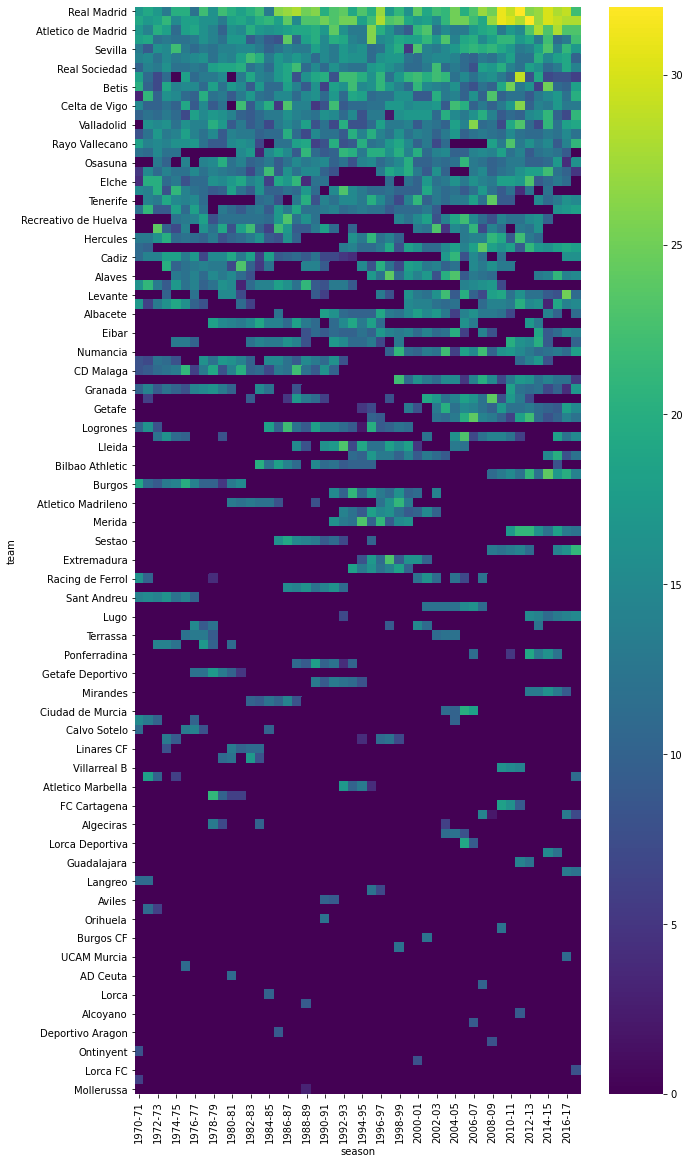

In [23]:
# The heat map shows us total wins per season over time for each team

plt.figure(figsize=(10, 20))
sns.heatmap(wins_per_season_pivot, cmap='viridis')

<ipython-input-29-3cd0a72156bb>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wps = wps.groupby(['team'])['total_wins','local_wins','visitor_wins'].sum().reset_index()
D:\Anaconda\Anaconda app\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


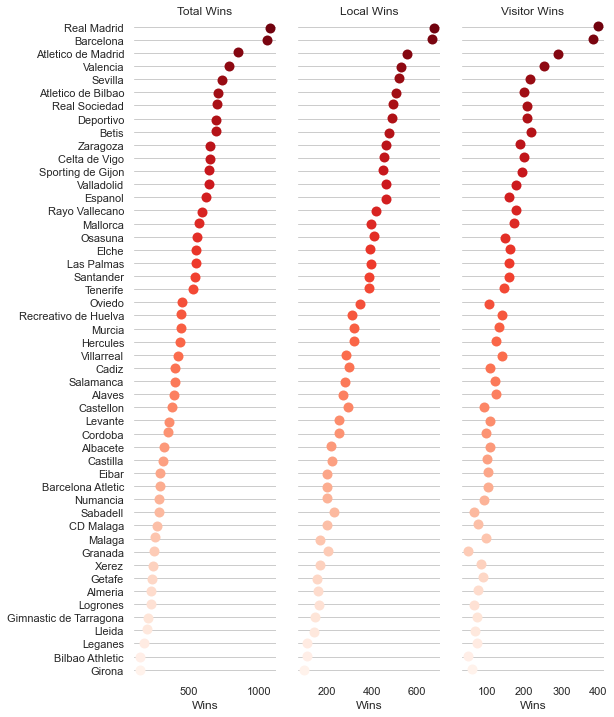

In [29]:
# Which wins contributed to the total wins for the top 50 teams
sns.set(style="whitegrid")


top_50 = wins_per_season[wins_per_season['team'].isin(total_wins_sorted_desc[:50])]
wps = top_50[['team','total_wins','local_wins','visitor_wins']]
wps = wps.groupby(['team'])['total_wins','local_wins','visitor_wins'].sum().reset_index()

# Pairgrid is created to store the plots of total wins,local wins and visitor wins
g = sns.PairGrid(wps.sort_values("total_wins", ascending=False),
                 x_vars=wps.columns[1:], y_vars=["team"],
                 size=10, aspect=.25)

# Stripplot is used to to show the wins of each team on the pairgrids
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")


g.set(xlabel="Wins", ylabel="")
titles = ["Total Wins", "Local Wins", "Visitor Wins"]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# From the plot we can see that the first two teams i.e Real madrid and Barcelona dominate other teams
# By a lot

<ipython-input-30-cee4a78f1990>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wps = wps.groupby(['team'])['total_wins','local_wins','visitor_wins'].sum().reset_index()
D:\Anaconda\Anaconda app\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


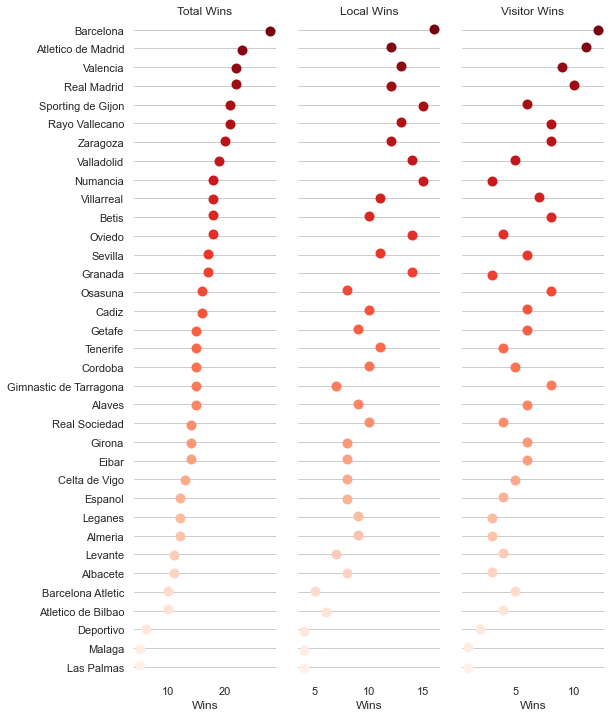

In [30]:
# We create the same plot as above for recent years.
# Since many teams have changed since then
sns.set(style="whitegrid")


top_50 = wins_per_season[(wins_per_season['team'].isin(total_wins_sorted_desc[:50]))
                         &
                         (wins_per_season['season'].isin(df['season'].sort_values(ascending=False)[:5]))]
wps = top_50[['team','total_wins','local_wins','visitor_wins']]
wps = wps.groupby(['team'])['total_wins','local_wins','visitor_wins'].sum().reset_index()


g = sns.PairGrid(wps.sort_values("total_wins", ascending=False),
                 x_vars=wps.columns[1:], y_vars=["team"],
                 size=10, aspect=.25)


g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")


g.set(xlabel="Wins", ylabel="")
titles = ["Total Wins", "Local Wins", "Visitor Wins"]

for ax, title in zip(g.axes.flat, titles):

    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# We can see here more teams have started to perform well but, barcelona still dominates whereas real madrid
# has come down

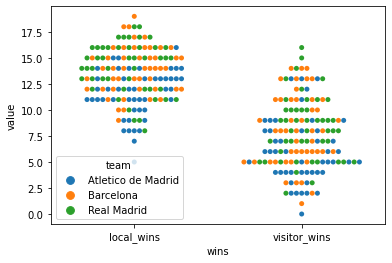

In [24]:
# Looking at wins per season for the top 3
# here each dot is a season


top3 = wins_per_season[wins_per_season['team'].isin(['Real Madrid', 'Barcelona', 'Atletico de Madrid'])]
melt = pd.melt(top3[['team','local_wins','visitor_wins']], 'team', var_name='wins')
sns.swarmplot(x="wins", y="value", hue="team", data=melt)
plt.show()

# compared to barcelona and real madrid, atletico de madrid are still a little behind them, but still catching up
# to them Barcelona has more local wins whereas real madrid has more visiotr wins.